In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# số lượng cá thể
n = 20
# khởi tạo vị trí cho các cá thể
X = np.random.randint(-10, 10, (n,2))
# khởi tạo vận tốc cho các cá thể
V = np.zeros((n,2))
def fitness(x):
    return x[0]*x[0] + x[1]*x[1]

In [52]:
# tham số của thuật toán
phi1  = 1.5
phi2 = 2
r1, r2 = np.random.rand(), np.random.rand()

In [53]:
# khởi tạo pbest cho từng các thể và gbest
pbests = []
for i in range(n):
    pbests.append(X[i])

gbest = pbests[0]
for i in range(1, n):
    if fitness(gbest) > fitness(pbests[i]):
        gbest = pbests[i]

In [54]:
# Cập nhật vân tốc cho từng cá thể
def update_V(old_pbests, old_gbest, old_V, old_X):
    return old_V + phi1*r1*(old_pbests - old_X) + phi2*r2*(old_gbest - old_X) 

# cập nhật vị trí cho từng cá thể    
def update_X(new_V, old_X):
    return old_X + new_V

# cập nhật vị trí tốt nhất cho từng cá thể tính đến thời điểm hiện tại
def update_pbest(old_pbests, new_X):
    for i in range(n):
        if fitness(old_pbests[i]) > fitness(new_X[i]):
            old_pbests[i] = new_X[i]
    return old_pbests

# cập nhật lời giải tốt nhất cho bài toán
def update_gbest(new_pbests, old_gbest):
    for i in range(n):
        if fitness(old_gbest) > fitness(new_pbests[i]):
            old_gbest = new_pbests[i]
    return old_gbest

In [55]:
fitnesses = []
epoches = 20
for _ in range(epoches):
    new_V = update_V(pbests, gbest, V, X)
    new_X = update_X(new_V, X)
    new_pbests = update_pbest(pbests, new_X)
    new_gbest = update_gbest(new_pbests, gbest)
    fitnesses.append([fitness(new_gbest), new_gbest])
    V = new_V
    X = new_X
    pbests = new_pbests
    gbests = new_gbest

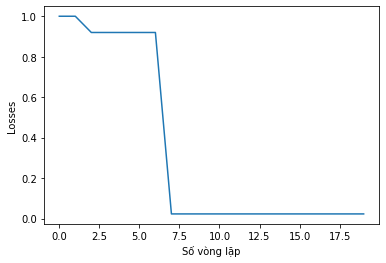

In [56]:
plt.plot([i for i in range(epoches)], [i[0] for i in fitnesses])
plt.xlabel('Số vòng lặp')
plt.ylabel('Losses')
plt.show()

In [57]:
result = fitnesses[-1][1]
result

array([ 0.13393258, -0.07146063])